## Module imports

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving Chicago_crimes.csv to Chicago_crimes.csv




```
# This is formatted as code
```

## Reading raw data

In [ ]:
## Original data was 2GB, hence considering a subset of it from 2012 to 2017

In [ ]:
crimes = pd.read_csv('Chicago_crimes.csv')
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
crimes.drop('Unnamed: 0',axis=1, inplace=True)

### Dataset size

In [ ]:
crimes.shape

(1456714, 22)

In [ ]:
## contains 1,456,714 rows and 22 columns

### Inspecting columns

In [ ]:
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## Total null values in the dataframe

In [ ]:
## Checking null values
crimes.isna().sum().sum()

187129

In [ ]:
crimes.isnull().sum(axis = 0)

ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of missing values')

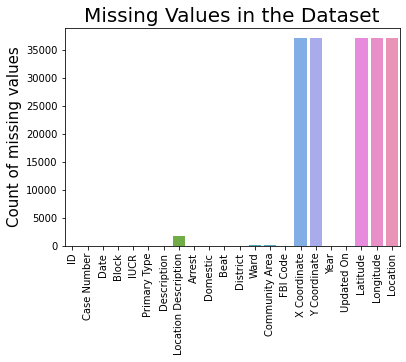

In [ ]:
# Plotting the missing values in the dataset
missing_values = sns.barplot(crimes.columns, crimes.isnull().sum(axis = 0))
missing_values = plt.xticks(rotation=90)
missing_values = plt.title("Missing Values in the Dataset", fontdict = {'fontsize': 20})
missing_values = plt.ylabel("Count of missing values", fontdict={'fontsize': 15})
missing_values

In [ ]:
## Features like longitude/latitude, location have the most null values

In [ ]:
missing_values.get_figure().savefig("Missing_Values.png")

## Dropping null rows

In [ ]:
crimes.dropna(inplace=True)

In [ ]:
crimes.shape

(1418365, 22)

## Checking duplicates based on crime IDs

In [ ]:
crimes['ID'].value_counts()

10487807    1
8450379     1
10527041    1
10533186    1
10531139    1
           ..
10553995    1
10564236    1
8469133     1
8462990     1
10487809    1
Name: ID, Length: 1418365, dtype: int64

Duplicates based on Crime Ids

In [ ]:
crimes.duplicated(subset=['ID'], keep='first')

0          False
1          False
2          False
3          False
4          False
           ...  
1456709    False
1456710    False
1456711    False
1456712    False
1456713    False
Length: 1418365, dtype: bool

In [ ]:
## Duplicates based on ID
## Count of duplicate IDs

In [ ]:
crimes[~crimes.duplicated(subset=['ID'], keep='first')].shape 

(1418365, 22)

In [ ]:
duplicate_ids = pd.concat(g for _, g in crimes.groupby("ID") if len(g) > 1)
duplicate_ids.shape

ValueError: ignored

In [ ]:
## this means no duplicate Ids found

### Duplicates based on Case numbers

In [ ]:
crimes[~crimes.duplicated(subset=['Case Number'], keep='first')].shape #Count of duplicate case numbers

(1418258, 22)

In [ ]:
deduped_crimes = crimes[~crimes.duplicated(subset=['Case Number'], keep='first')]

In [ ]:
duplicate_cases = pd.concat(g for _, g in crimes.groupby("Case Number") if len(g) > 1)
duplicate_cases.shape #There are 200 duplicate cases by case number

(200, 22)

In [ ]:
duplicate_cases.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1267991,20486,HV005095,06/30/2012 02:15:00 AM,025XX S KILDARE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,1013,10.0,22.0,30.0,01A,1148346.0,1886858.0,2012,08/17/2015 03:03:40 PM,41.845479,-87.731080,"(41.84547885, -87.731079671)"
1267994,20487,HV005095,06/30/2012 02:15:00 AM,025XX S KILDARE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,1013,10.0,22.0,30.0,01A,1148346.0,1886858.0,2012,08/17/2015 03:03:40 PM,41.845479,-87.731080,"(41.84547885, -87.731079671)"
1267641,20257,HV128067,01/23/2012 12:30:00 AM,076XX N SHERIDAN RD,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,2422,24.0,49.0,1.0,01A,1165468.0,1950779.0,2012,08/17/2015 03:03:40 PM,42.020535,-87.666419,"(42.0205349, -87.666418834)"
1267644,20258,HV128067,01/23/2012 12:30:00 AM,076XX N SHERIDAN RD,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,2422,24.0,49.0,1.0,01A,1165468.0,1950779.0,2012,08/17/2015 03:03:40 PM,42.020535,-87.666419,"(42.0205349, -87.666418834)"
1267677,20281,HV164849,02/19/2012 06:40:00 PM,025XX E 79TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,421,4.0,7.0,43.0,01A,1194335.0,1853075.0,2012,08/17/2015 03:03:40 PM,41.751767,-87.563418,"(41.751767411, -87.563417608)"


## Mapping Chicago

In [ ]:
df1 = deduped_crimes
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Day']=pd.to_datetime(df1['Date']).dt.day
df1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,3
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,3
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,3
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,3
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)",5,3
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)",5,3
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)",5,3
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)",5,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


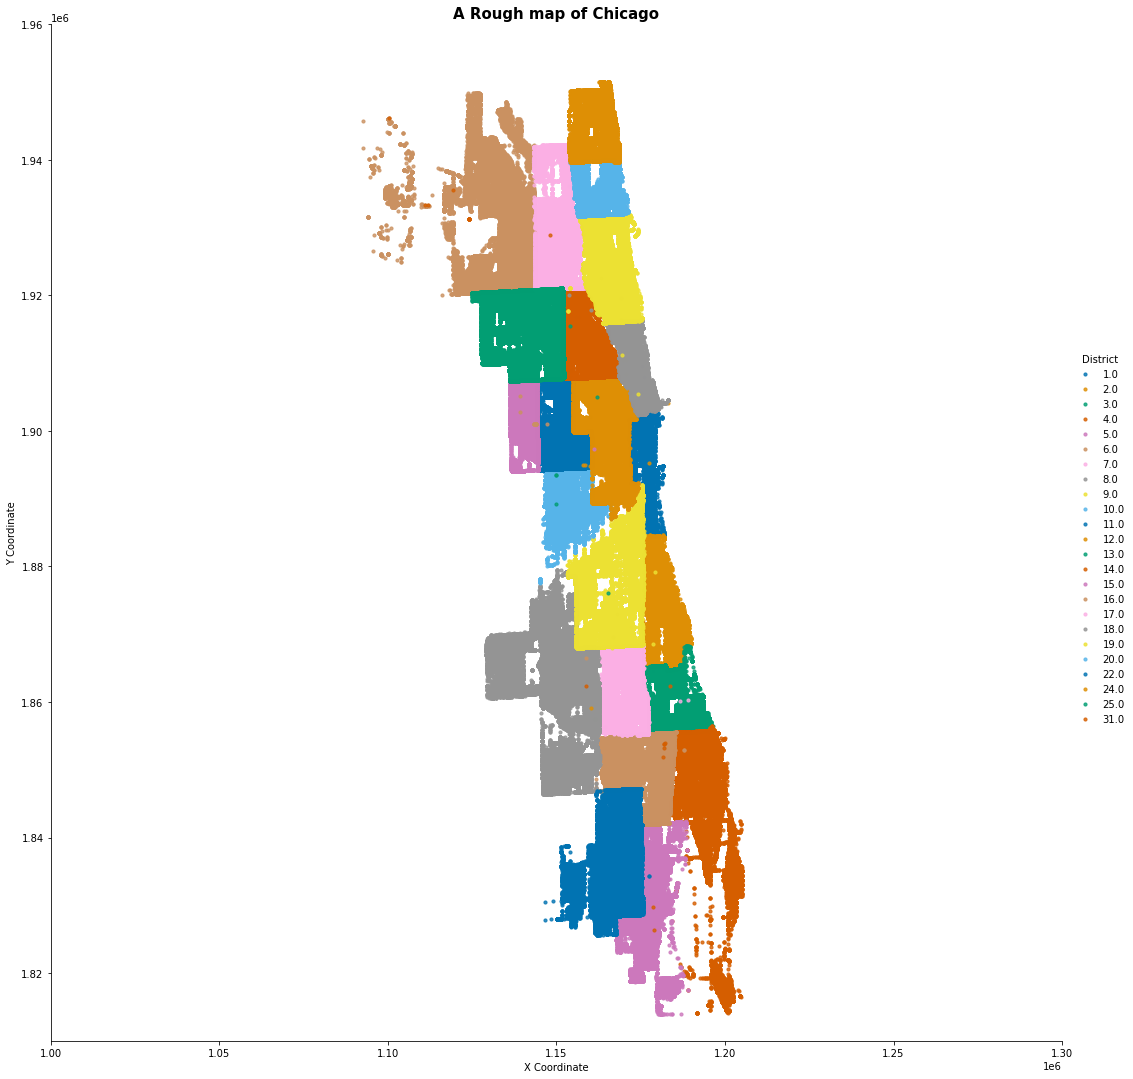

In [ ]:
# Let's simulate the map of Chicago with the help of X and Y co-ordinates
ax = sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df1,
           fit_reg=False,
           hue="District",
           palette='colorblind',
           height=15,
           scatter_kws={"marker": "o","s": 10})
ax.set(ylim=(1810000, 1960000))
ax.set(xlim=(1000000, 1300000))
ax = plt.gca()
ax.set_title("A Rough map of Chicago", fontdict={'fontsize': 15}, weight="bold")
plt.show()

In [ ]:
ax.get_figure().savefig("Rough Map.png")

## Crimes over Month

In [ ]:
A = deduped_crimes.groupby(by=['Month','Primary Type'],sort=False, as_index=False).size()
print (A)

     Month                       Primary Type   size
0        5                            BATTERY  25290
1        5             PUBLIC PEACE VIOLATION   1371
2        5                              THEFT  27630
3        5                  WEAPONS VIOLATION   1621
4        5                            ROBBERY   4744
..     ...                                ...    ...
379      7                           HOMICIDE    245
380      8                           HOMICIDE    281
381     10                           HOMICIDE    206
382      4                       NON-CRIMINAL      2
383      8  CONCEALED CARRY LICENSE VIOLATION      7

[384 rows x 3 columns]


               size                   ...                                    
Primary Type  ARSON ASSAULT  BATTERY  ... STALKING    THEFT WEAPONS VIOLATION
Month                                 ...                                    
1             149.0  6124.0  18683.0  ...     64.0  24188.0            1273.0
2             120.0  5753.0  16770.0  ...     42.0  20347.0            1038.0
3             176.0  7530.0  21491.0  ...     64.0  24139.0            1423.0
4             192.0  7389.0  21279.0  ...     61.0  25220.0            1412.0
5             225.0  8840.0  25290.0  ...     66.0  27630.0            1621.0
6             200.0  8678.0  25369.0  ...     67.0  29083.0            1620.0
7             239.0  8435.0  25108.0  ...     67.0  31425.0            1671.0
8             210.0  8398.0  24189.0  ...     65.0  31238.0            1611.0
9             182.0  7979.0  22113.0  ...     90.0  29039.0            1575.0
10            176.0  7774.0  21445.0  ...     66.0  28556.0     

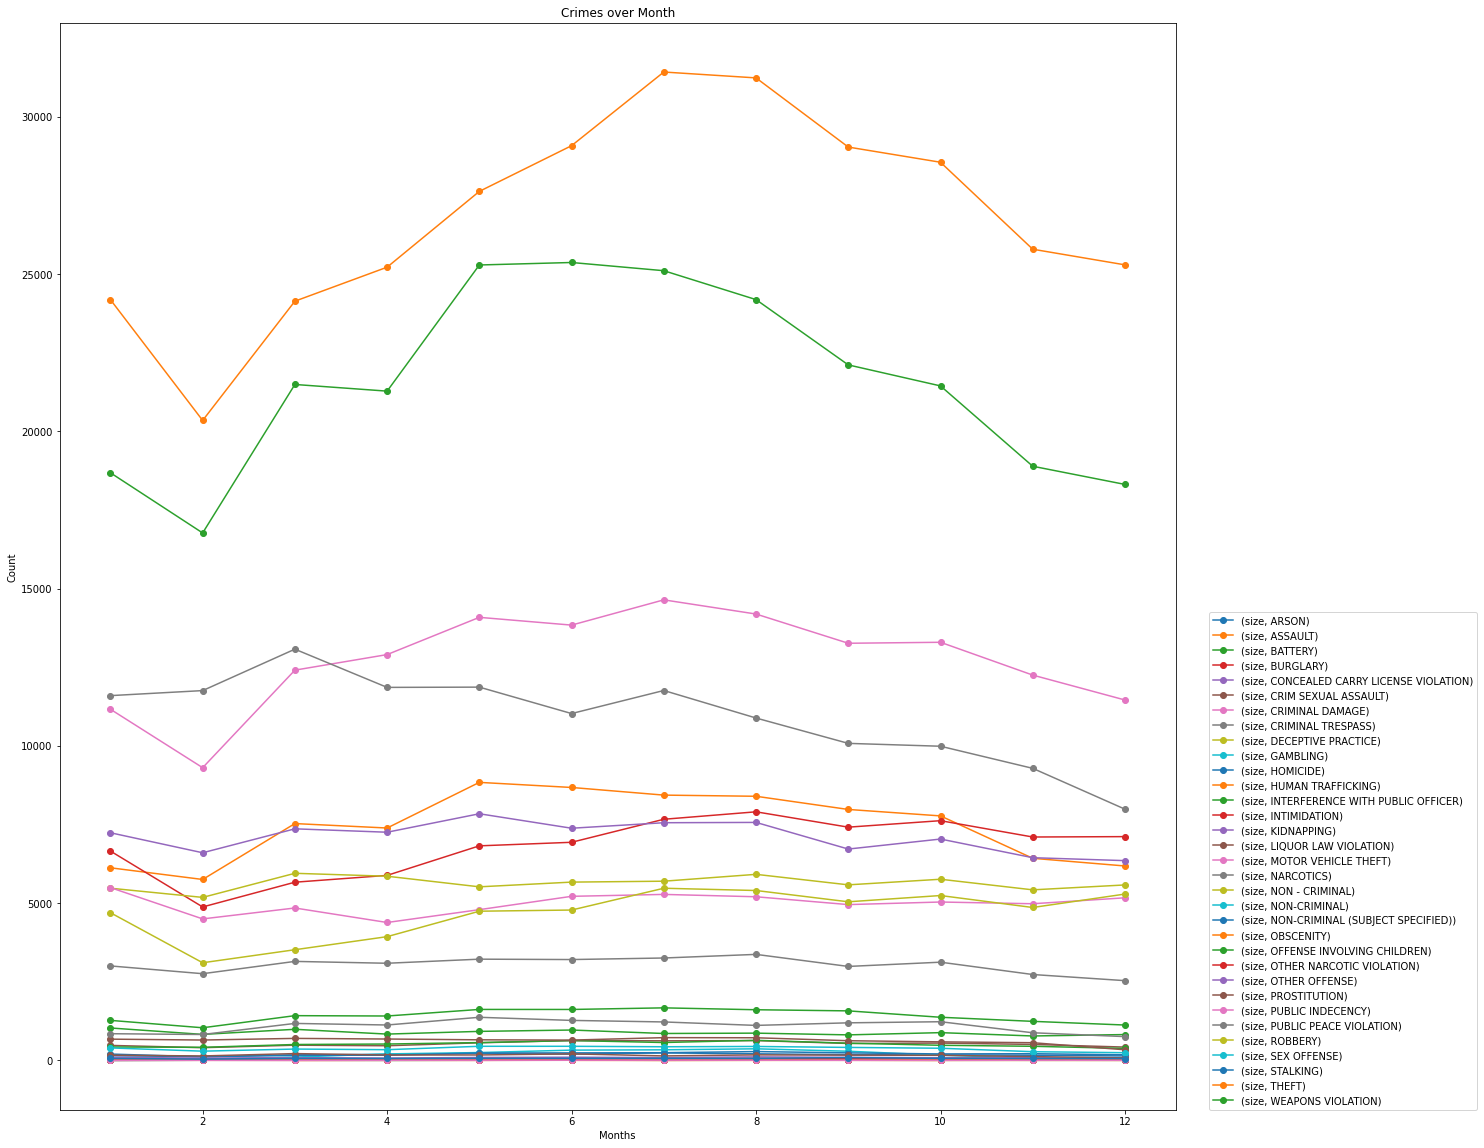

In [ ]:
df1 = pd.pivot_table(A, values=['size'], index=['Month'], columns=['Primary Type'])
print(df1)
month_crime = df1.plot(kind='line', title='Crimes over Month', figsize=(20,20), marker='o')
month_crime.set_xlabel("Months")
month_crime.set_ylabel("Count")
month_crime.legend(loc=(1.03,0))

In [ ]:
month_crime.get_figure().savefig("Month_Crime.png")

## Crimes over Year

In [ ]:
B = deduped_crimes.groupby(by=['Year','Primary Type'],sort=False, as_index=False).size()
print (B)

     Year                      Primary Type   size
0    2016                           BATTERY  48686
1    2016            PUBLIC PEACE VIOLATION   1579
2    2016                             THEFT  58328
3    2016                 WEAPONS VIOLATION   3398
4    2016                           ROBBERY  11611
..    ...                               ...    ...
154  2014                 HUMAN TRAFFICKING      1
155  2016                    NON - CRIMINAL      5
156  2016  NON-CRIMINAL (SUBJECT SPECIFIED)      1
157  2016          OTHER NARCOTIC VIOLATION      4
158  2017                          HOMICIDE     27

[159 rows x 3 columns]


               size                    ...                                    
Primary Type  ARSON  ASSAULT  BATTERY  ... STALKING    THEFT WEAPONS VIOLATION
Year                                   ...                                    
2012          469.0  19890.0  59117.0  ...    207.0  75052.0            3897.0
2013          364.0  17925.0  53869.0  ...    146.0  71127.0            3242.0
2014          390.0  16668.0  48690.0  ...    130.0  60613.0            3104.0
2015          448.0  16945.0  48579.0  ...    149.0  56830.0            3342.0
2016          504.0  18080.0  48686.0  ...    142.0  58328.0            3398.0
2017            NaN      NaN      NaN  ...      NaN      NaN               NaN

[6 rows x 33 columns]


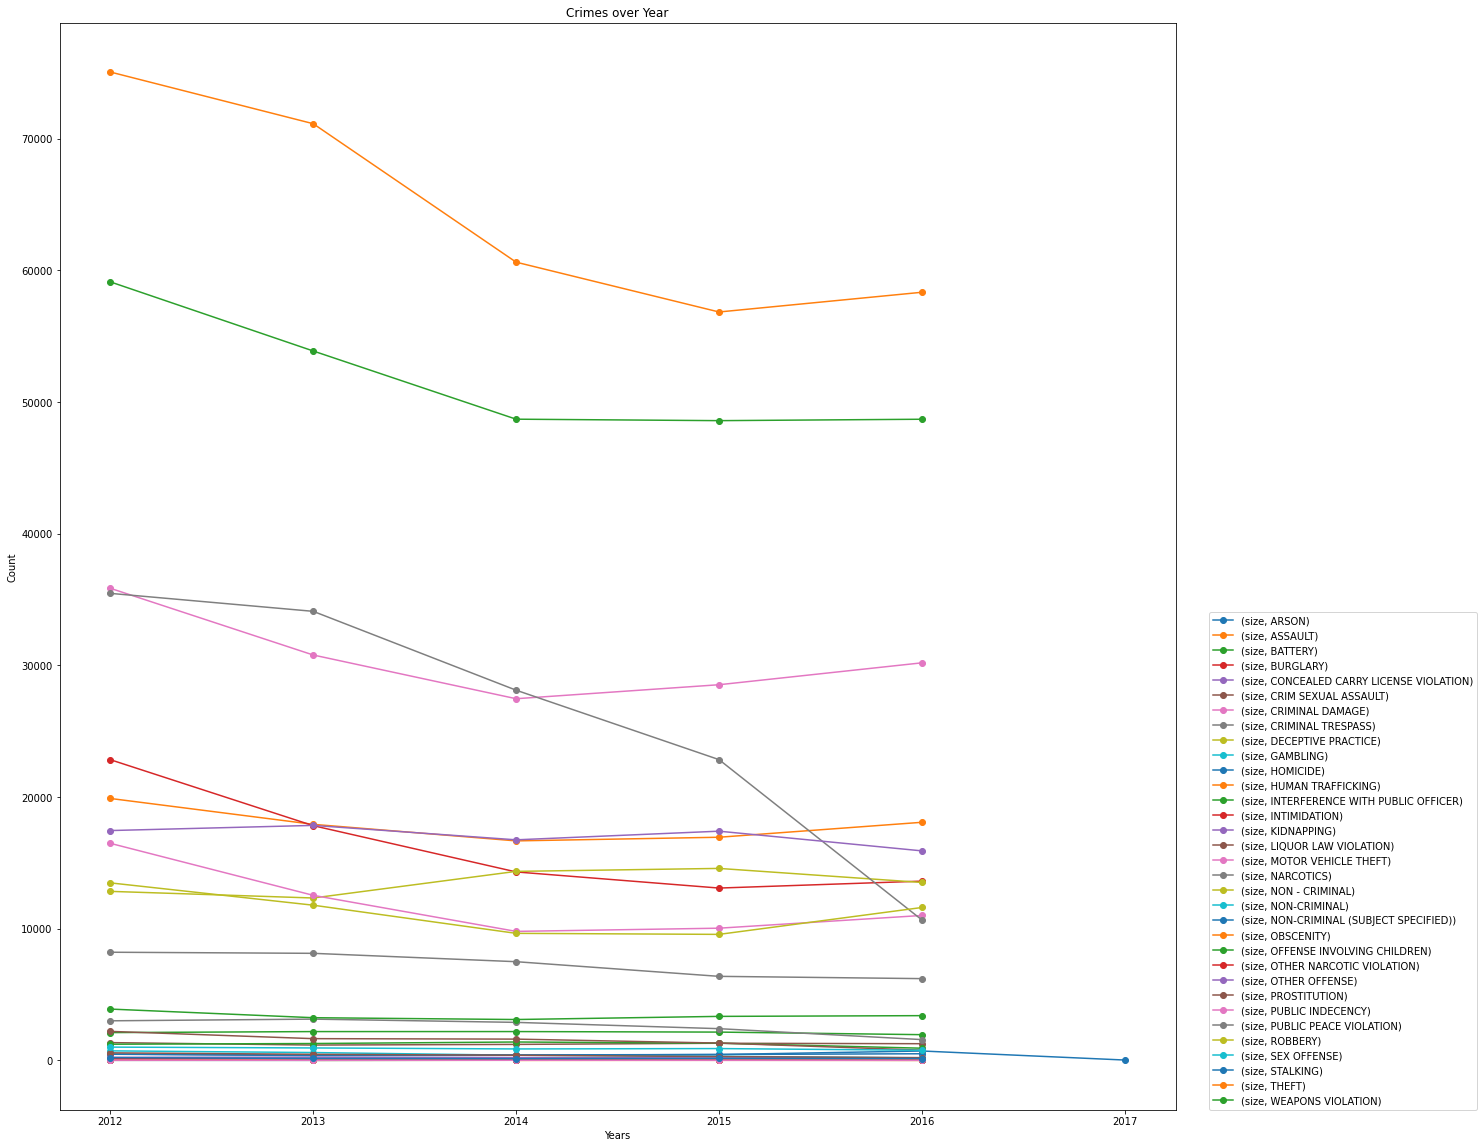

In [ ]:
df2 = pd.pivot_table(B, values=['size'], index=['Year'], columns=['Primary Type'])
print(df2)
year_crime = df2.plot(kind='line', title='Crimes over Year', figsize=(20,20), marker='o')
year_crime.set_xlabel("Years")
year_crime.set_ylabel("Count")
year_crime.legend(loc=(1.03,0))

In [ ]:
year_crime.get_figure().savefig("Year_Crime.png")

## Analysis on Location and location description

In [ ]:
## These are the different location descriptions
deduped_crimes['Location Description'].unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE',
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY', 'ALLEY',
       'VACANT LOT/LAND', 'GAS STATION',
       'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL', 'TAXICAB',
       'SCHOOL, PRIVATE, GROUNDS', 'COMMERCIAL / BUSINESS OFFICE',
       'ATM (AUTOMATIC TELLER MACHINE)', 'LIBRARY', 'HIGHWAY/EXPRESSWAY',
       'CONVENIENCE STORE', 'TAVERN/LIQUOR STORE', 'ABANDONED BUILDING',
    

In [ ]:
deduped_crimes['Location Description'].value_counts()[:30]

STREET                            325040
RESIDENCE                         223854
APARTMENT                         179431
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31237
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
GROCERY FOOD STORE                 15742
GAS STATION                        15019
PARK PROPERTY                      12102
BAR OR TAVERN                       9603
COMMERCIAL / BUSINESS OFFICE        7412
CTA PLATFORM                        7173
CTA TRAIN                           6968
CONVENIENCE STORE                   6544
VACANT LOT/LAND                     6507
SCHOOL, PUBLIC, 

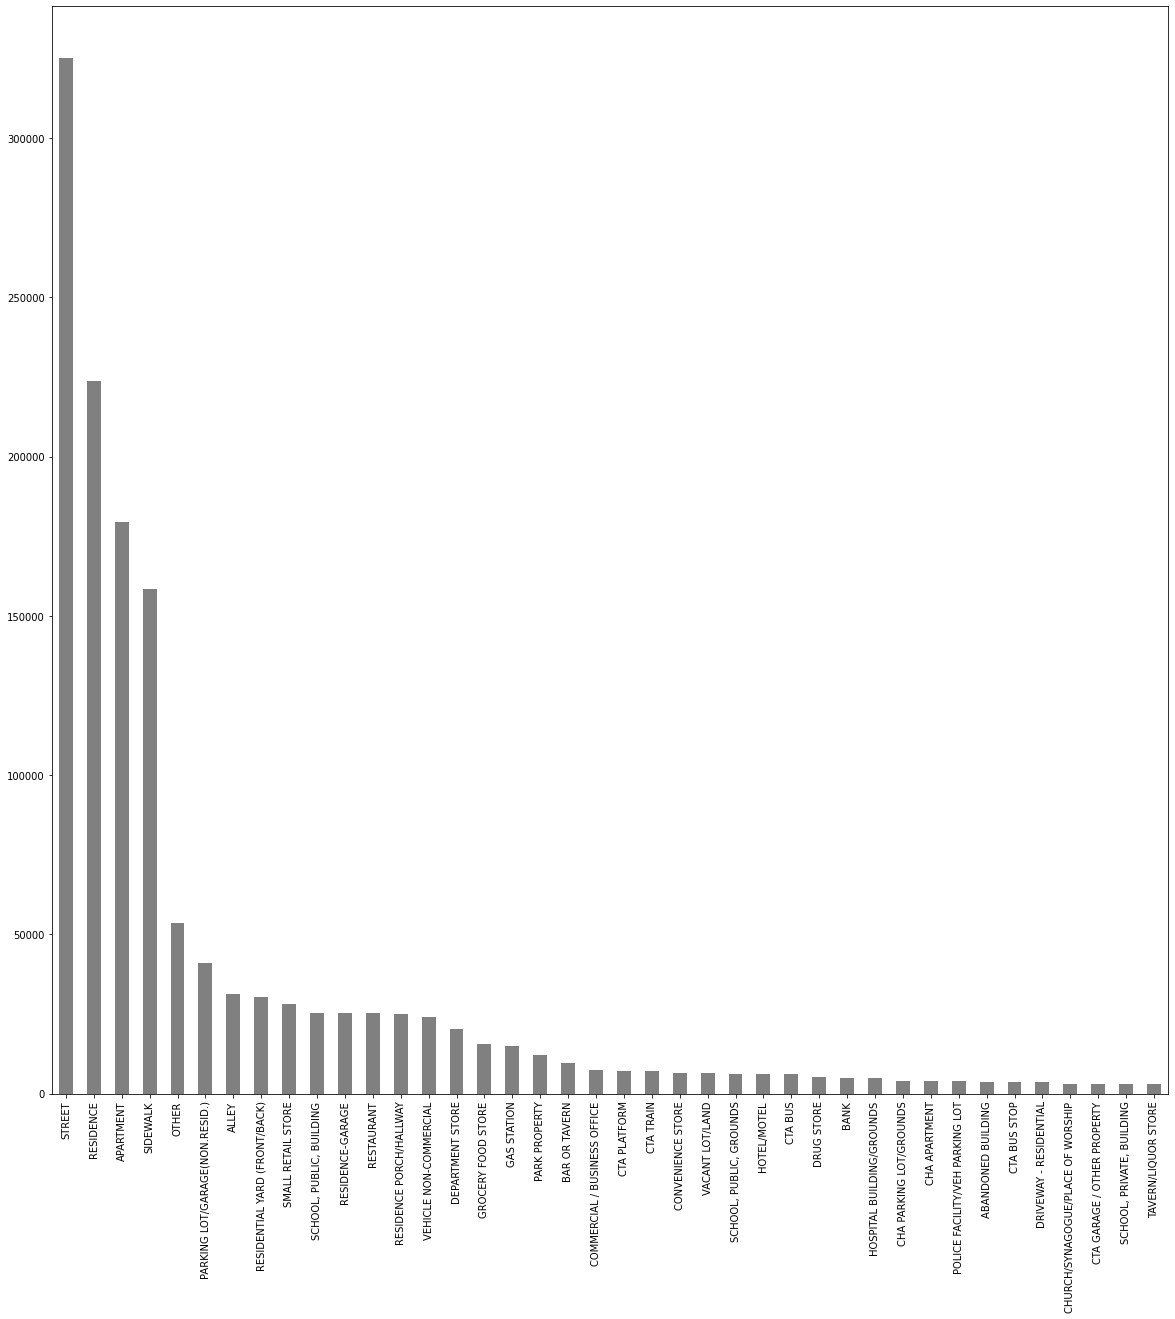

In [ ]:
## Plotting distribution
cx= plt.figure(figsize=(20, 20))
cx= deduped_crimes['Location Description'].value_counts()[:40].plot(kind='bar', color=['grey'])

In [ ]:
## Observation - mostly residential. Distribution is hevily skewed. Street crimes are the highest.

In [ ]:
cx.get_figure().savefig("Location_crime.png")

### Analysis on type of crime

In [ ]:
## These are the different types of crimes
deduped_crimes['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [ ]:
deduped_crimes['Primary Type'].value_counts()

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7566
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2484
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

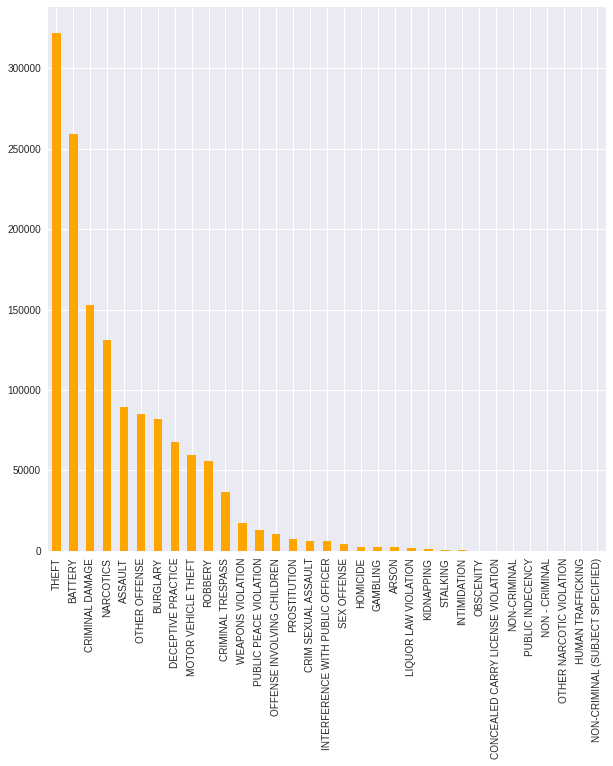

In [ ]:
## Plotting distribution
dx= plt.figure(figsize=(10, 10))
dx = deduped_crimes['Primary Type'].value_counts().plot(kind='bar', color='orange')
dx 

In [ ]:
dx.get_figure().savefig("Crime_Type.png")

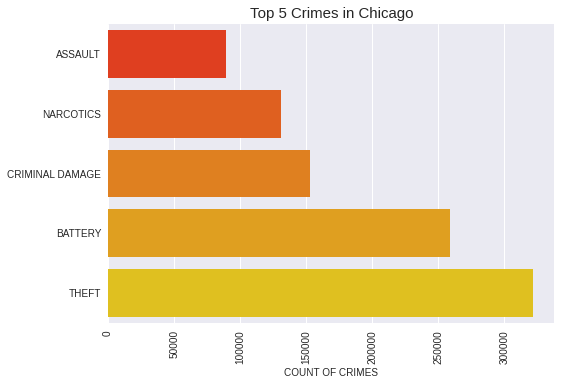

In [ ]:
# Set the style of the plot first
plt.style.use('seaborn')

# Filter out the Top 5 crimes
top_5_crimes = crimes['Primary Type'].value_counts().sort_values(ascending=False).head()

temp = crimes.groupby('Primary Type', as_index=False).agg({"ID": "count"})
temp = temp.sort_values(by=['ID'], ascending=False).head()
temp = temp.sort_values(by='ID', ascending=True)
temp_plot = sns.barplot(x='ID', y='Primary Type', data=temp, palette="autumn")

# Work on the aestehtic appeal of the plot
plt.title("Top 5 Crimes in Chicago", fontdict = {'fontsize': 15})
plt.xlabel("COUNT OF CRIMES", fontdict = {'fontsize': 10})
plt.ylabel("")
plt.xticks(rotation=90)
temp_plot

In [ ]:
temp_plot.get_figure().savefig("Highest_Crime.png")

## Visualizing with Heatmaps

In [ ]:
cri = df1.groupby(['Location Description','Month'], as_index=False).agg({"Primary Type":"count"})
cri = cri.sort_values(by=['Primary Type','Month'], ascending=False)

In [ ]:
cri = cri.head(300)
cri = cri.pivot("Location Description", "Month", "Primary Type")

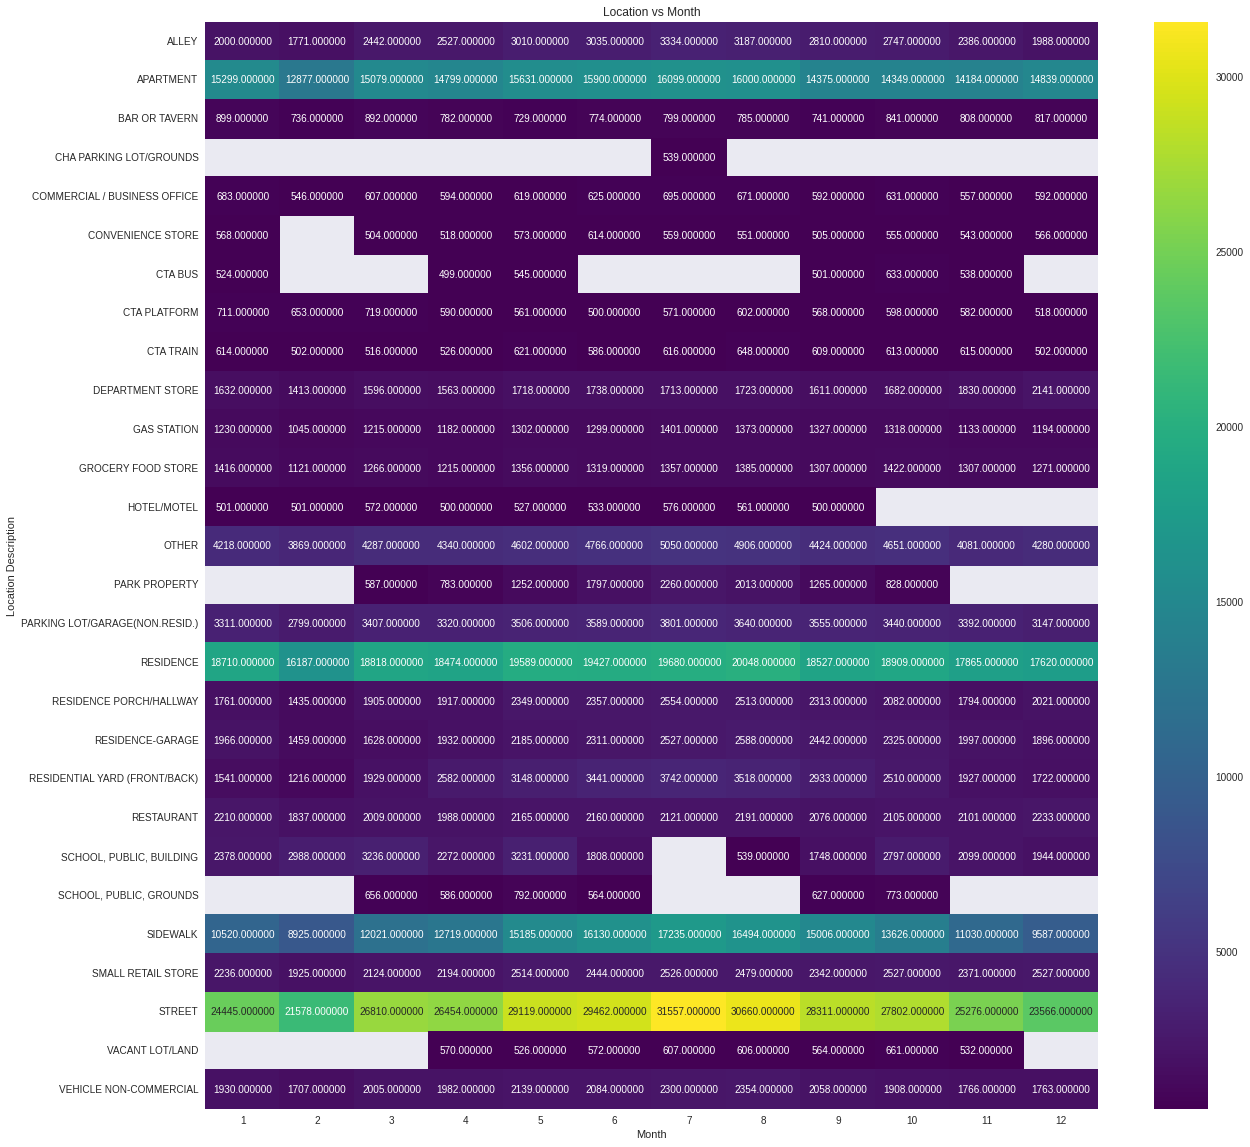

In [ ]:
# Plotting for Location vs Month
plt.figure(figsize = (20,20))
plt.title("Location vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri, mask=cri.isnull(), cmap="viridis",annot=True,fmt="f")

In [ ]:
cri2 = df1.groupby(['Location Description','Year'], as_index=False).agg({"Primary Type":"count"})
cri2 = cri2.sort_values(by=['Primary Type','Year'], ascending=False)

In [ ]:
cri2 = cri2.head(300)
cri2 = cri2.pivot("Location Description", "Year", "Primary Type")

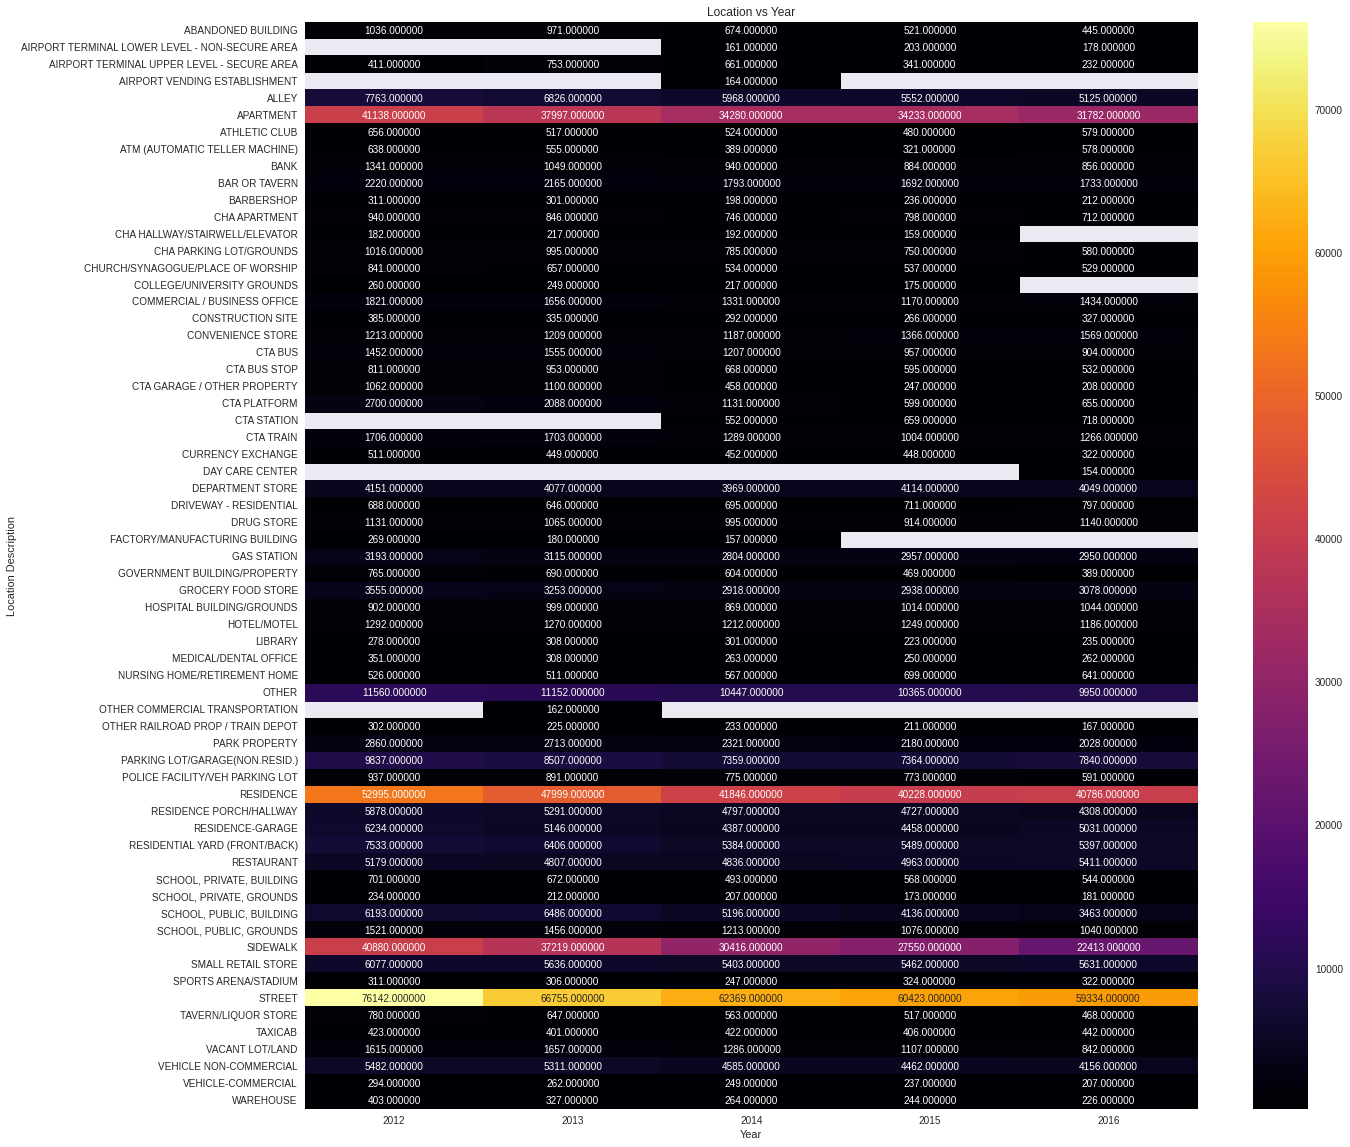

In [ ]:
# Plotting for Location vs Year
plt.figure(figsize = (20,20))
plt.title("Location vs Year")
with sns.axes_style("dark"):
    sns.heatmap(cri2, mask=cri2.isnull(), cmap="inferno",annot=True,fmt="f")

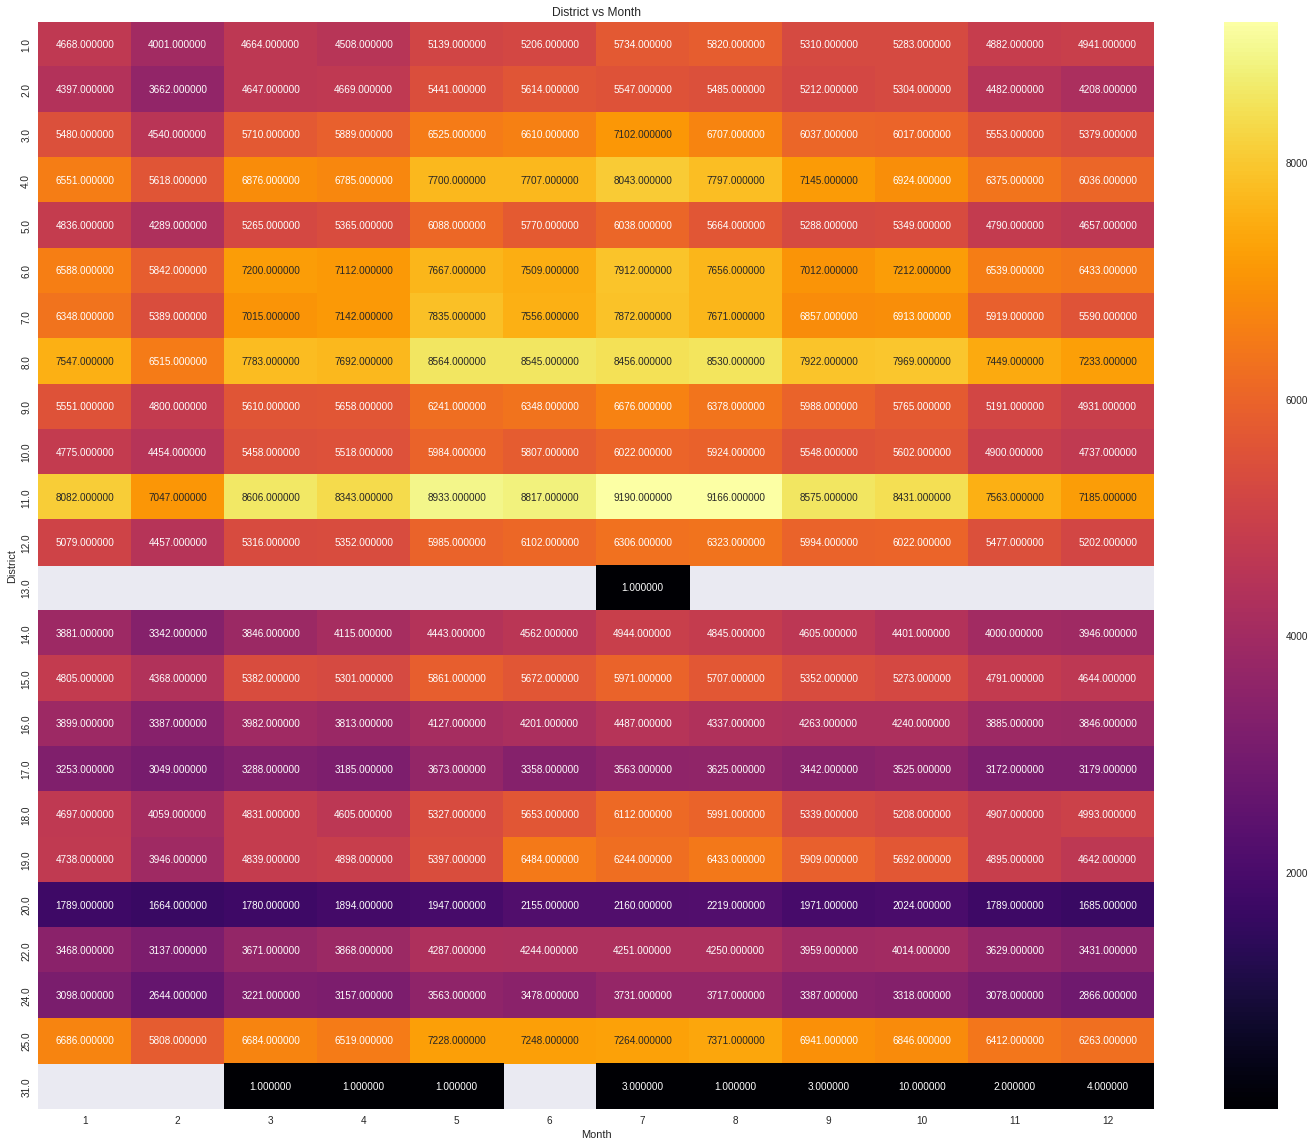

In [ ]:
#Plotting for District vs Month 
cri3 = df1.groupby(['District','Month'],as_index=False).agg({'Primary Type':"count"})
cri3 = cri3.pivot("District", "Month", "Primary Type")

plt.figure(figsize = (25,20))
plt.title("District vs Month")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=cri3.isnull(), cmap="inferno", annot=True, fmt="f")

Enter the crime you wish to see the concentration of in the city >> Stalking


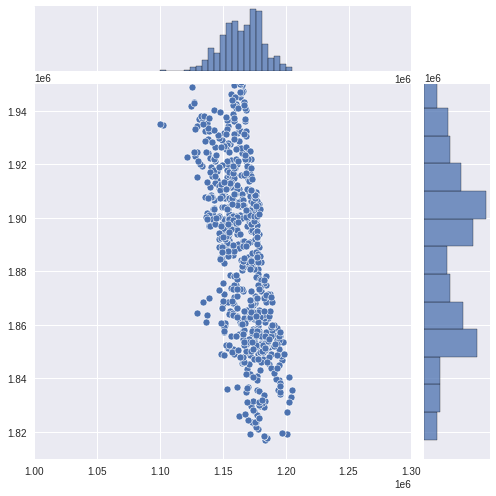

In [ ]:
c = input("Enter the crime you wish to see the concentration of in the city >> ")
crime_df = df1[deduped_crimes['Primary Type']==c.upper()]

sns.jointplot(x=crime_df['X Coordinate'].values, y=crime_df['Y Coordinate'].values, height=7, xlim=(1000000, 1300000), ylim=(1810000, 1950000))
plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

## Likelihood of an Arrest

In [ ]:
whether_arrested = df1["Arrest"].value_counts()
false = whether_arrested[0]
true = whether_arrested[1]

arrest = pd.DataFrame({'Status':['Not Arrested','Arrested'],'Value':list(whether_arrested)})
print("Percentage of no arrests of all reported crimes :",false/(false+true)*100,'!')

Percentage of no arrests of all reported crimes : 73.84086675343978 !


About 74% chance of evading arrests.

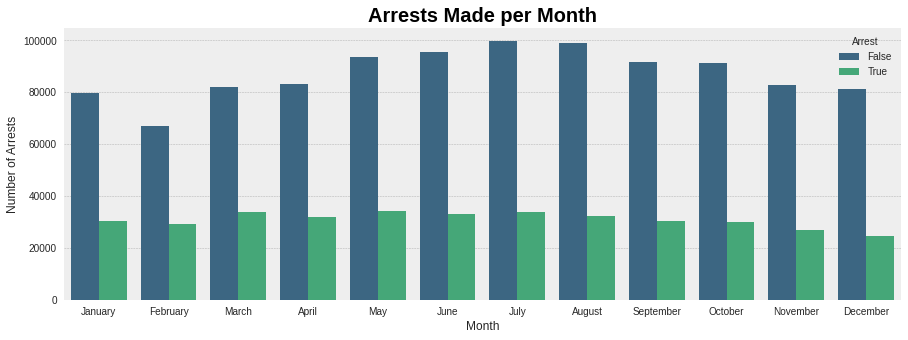

In [ ]:
# How are arrests spread out across the months
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df1[{'Month','Arrest'}],
                   palette='viridis')
months = ['January','February','March','April','May','June','July','August','September','October','November','December']    

ax.set(title='Arrests Made per Month', xlabel='Month', ylabel='Number of Arrests', xticklabels=months)
plt.title('Arrests Made per Month', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

In [ ]:
ax.get_figure().savefig("Arrests_Month.png")

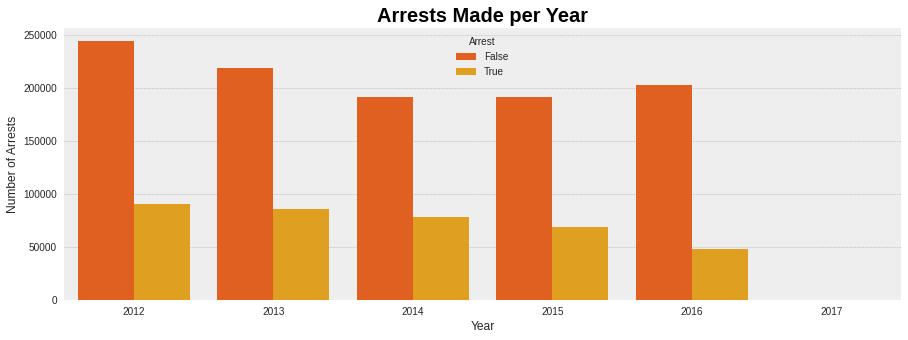

In [ ]:
# How are arrests spread out across the years
plt.style.use('bmh')

fig, fx = plt.subplots(figsize=(15, 5))
fx = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df1[{'Year','Arrest'}],
                   palette='autumn')

fx.set(title='Arrests Made per Month', xlabel='Year', ylabel='Number of Arrests')
plt.title('Arrests Made per Year', fontdict={'fontsize': 20, 'color': 'black'}, weight="bold")
plt.show()

In [ ]:
fx.get_figure().savefig("Arrests_Year.png")